Epoch 1/20
16/16 [==============================] - 104s 6s/step - loss: 1.8983 - accuracy: 0.4663 - val_loss: 1.0354 - val_accuracy: 0.6398
Epoch 2/20
16/16 [==============================] - 99s 6s/step - loss: 0.6184 - accuracy: 0.7751 - val_loss: 0.7195 - val_accuracy: 0.7678
Epoch 3/20
16/16 [==============================] - 99s 6s/step - loss: 0.3216 - accuracy: 0.8916 - val_loss: 0.5744 - val_accuracy: 0.7962
Epoch 4/20
16/16 [==============================] - 99s 6s/step - loss: 0.2173 - accuracy: 0.9346 - val_loss: 0.5223 - val_accuracy: 0.8057
Epoch 5/20
16/16 [==============================] - 99s 6s/step - loss: 0.1488 - accuracy: 0.9571 - val_loss: 0.5053 - val_accuracy: 0.8483
Epoch 6/20
16/16 [==============================] - 99s 6s/step - loss: 0.1186 - accuracy: 0.9652 - val_loss: 0.4765 - val_accuracy: 0.8341
Epoch 7/20
16/16 [==============================] - 99s 6s/step - loss: 0.0887 - accuracy: 0.9857 - val_loss: 0.4701 - val_accuracy: 0.8294
Epoch 8/20
16/16 [=

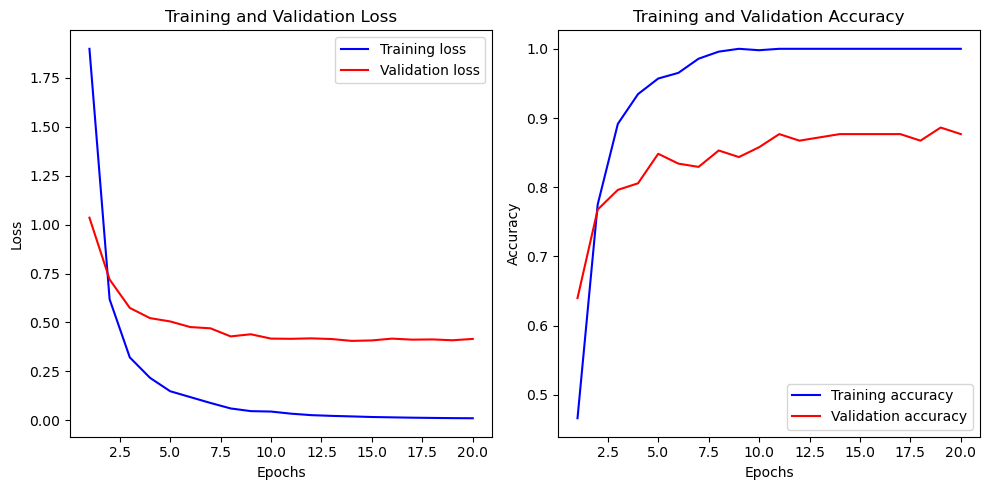

1/1 [==============================] - 0s 159ms/step


In [ ]:
import os
import tkinter as tk
from tkinter import filedialog
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image, ImageTk
import matplotlib.pyplot as plt


# Adjust this path according to your dataset structure
dataset_path = r"D:\4th year\ELECTIVE 4\training_data"
class_names = os.listdir(dataset_path)

# Load and preprocess the dataset
data = []
labels = []

for class_index, class_name in enumerate(class_names):
    class_path = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)
        data.append(img_array)
        labels.append(class_index)

data = np.array(data)
labels = to_categorical(labels)

# Split the dataset into training and holdout sets
X_train, X_holdout, y_train, y_holdout = train_test_split(data, labels, test_size=0.3, random_state=42)

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a GlobalAveragePooling2D layer and a Dense softmax layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(class_names), activation='softmax')(x)

# Create a new model with the modified softmax layer
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the convolutional layers for feature extraction
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training set
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.3)


# Evaluate the model on the holdout set
holdout_loss, holdout_accuracy = model.evaluate(X_holdout, y_holdout)
print(f'Holdout Accuracy: {holdout_accuracy * 100:.2f}%')

# Plotting the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 5))

# Plotting the loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Create the GUI window
window = tk.Tk()
window.geometry("600x600")
window.title("Rice Leaf Diseases Detection - VGG16 Model")

# Create a canvas with a white background
canvas = tk.Canvas(window, width=570, height=100, bg="#BCE954", highlightthickness=0)
canvas.grid(row=0, column=0, columnspan=5, padx=10, pady=10)


# Load and resize the image using the LANCZOS filter
image_path = r"D:\4th year\ELECTIVE 4\rice.png"
original_image = Image.open(image_path)
resized_image = original_image.resize((100, 100), Image.LANCZOS)
photo = ImageTk.PhotoImage(resized_image)
canvas.photo = photo


# Create an image item on the canvas
canvas.create_image(50, 50, anchor="center", image=photo)


# Add title to the canvas
canvas.create_text(100, 30, text="Rice Leaf Diseases", anchor="w", font=("Arial", 30, "bold"), fill="white")
canvas.create_text(150, 65, text="Detect different diseases of Rice leaf", anchor="w", font=("Arial", 14, "bold"))

# Add a line to separate the two text items
canvas.create_line(70, 50, 600, 50, fill="black")  # You can adjust the coordinates and color as needed


# Function to classify image
def classify_image(img_path):
    global displayed_image

    # Load and preprocess the input image
    img = Image.open(img_path)
    img = img.resize((224, 224), Image.LANCZOS)

    # Make predictions
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    predictions = model.predict(img_array)

    # Display the selected image
    displayed_image = ImageTk.PhotoImage(img)  # Save reference to prevent garbage collection
    panel = tk.Label(window, image=displayed_image)
    panel.grid(row=2, column=2, columnspan=2)

    # Display the top prediction with softmax score
    result_text.set(f"Predicted Class: {class_names[np.argmax(predictions)]}")

    # Display the top 3 predictions with softmax scores
    result_text.set(result_text.get() + "\nTop 3 Predictions:")
    top_3_indices = np.argsort(predictions[0])[::-1][:3]
    for i, index in enumerate(top_3_indices):
        class_name = class_names[index]
        softmax_score = predictions[0, index]
        result_text.set(result_text.get() + f"\n{i + 1}: {class_name} ({softmax_score:.2%})")

# Function to open file dialog
def open_file_dialog():
    file_path = filedialog.askopenfilename()
    if file_path:
        classify_image(file_path)

# Button to open file dialog
btn_open_file = tk.Button(window, text="Click here to Open an Image", command=open_file_dialog, bg="#3498db", fg="white", font=("Arial", 12))
btn_open_file.grid(row=10, column=2, padx=10, pady=10)


# Text to display the result
result_text = tk.StringVar()
result_label = tk.Label(window, textvariable=result_text, font=("Arial", 12))
result_label.grid(row=1, column=2, columnspan=2, pady=10)

# Accuracy label
accuracy_label = tk.Label(window, text=f'Overall Accuracy: {holdout_accuracy * 100:.2f}%', font=("Arial", 12))
accuracy_label.grid(row=3, column=2, columnspan=2, pady=10)

# Run the GUI
window.mainloop()